## Exercise for KYBS3050

### Mika Lammi 2022

## Description of data and goal of this exercise


### Creating a machine learning algorithm to detect spam emails

My goal is to create a machine learning model which can classify incoming emails as spam or non-spam emails. The practical usage would be to have the algorithm filter out spam emails from user's inbox to the spam folder.

My personal goal is to be able to make model at least 99 % accuracy and precision.


### What data am I using

The data I am using in this exercise is Spambase Data Set from UCI Machine learning repository [(source of the dataset)](https://archive.ics.uci.edu/ml/datasets/Spambase).

It is a collection of email data separated into two categories: spam and non-spam e-mails. The source of spam e-mails come from their postmaster and individuals who had filed those emails as spam. Collection of non-spam e-mails come from filed work and personal e-mails.

The data is useful for constructing personalized spam filters and it isn't really suitable for generating all purpose spam filters for general public. However, I think that his dataset is suitable for my current exercise.







In [3]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
# Download the data for usage
def getDataset():
    url = "https://www.dropbox.com/s/vwiyk1qeq87xuku/spambase.data.csv?dl=1"
    dataset = np.array(pd.read_csv(url))
    headers = pd.read_csv(url, index_col=0, nrows=0).columns.tolist()
    cols = dataset.shape[1]
    classifications = np.array(dataset[:, cols-1])
    data = dataset[:,0:cols-1]
    feature_names = headers[0:cols-2]
    return data, classifications, feature_names

# classification: 1 = spam, 0 = non-spam
X, y, feature_names = getDataset()

print("Data shape: ", X.shape)
print("Feature names: ", feature_names)

Data shape:  (4601, 57)
Feature names:  ['word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 

Ohjattuun koneoppimiseen tarvitaan
- Data X ja taustatieto y
- Jokin malli r(x) = w^T*x, missä x kuuluu X ja w on painokerroin
- Kustannusfunktio J(w, b) = d(y, r(x))
- Optimointimenetelmä, joka min[w] J(w, b)

In [5]:
def splitData(X, y, random_state=100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state, shuffle=True)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = splitData(X, y)

print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)
print("Testing classification length: ", len(y_test))
print("Training classification length: ", len(y_train))

Training data shape:  (3082, 57)
Test data shape:  (1519, 57)
Testing classification length:  1519
Training classification length:  3082


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

5
6


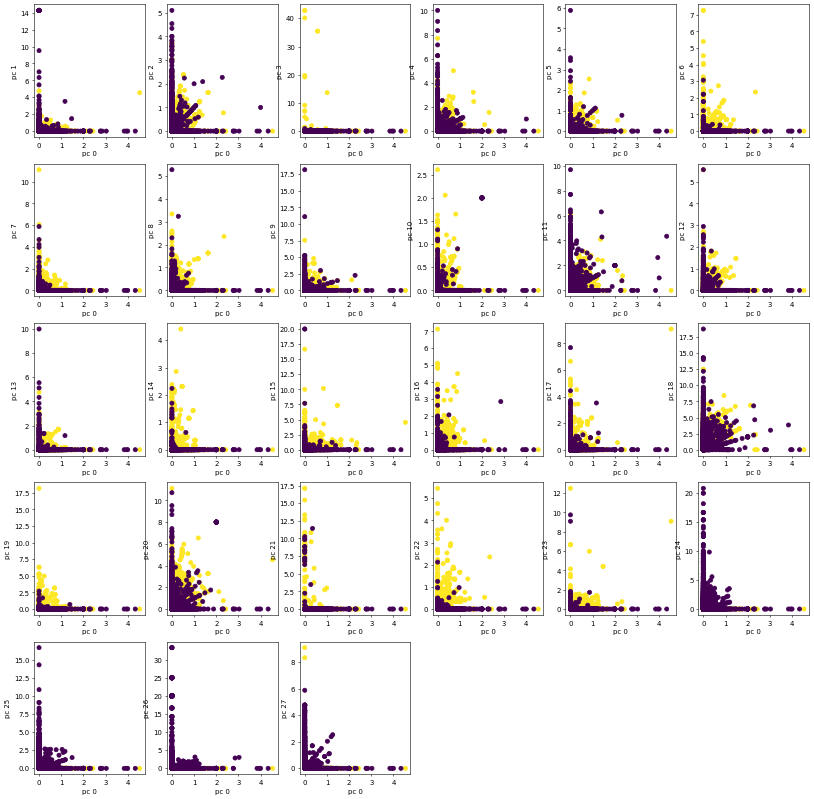

In [49]:
# Visualizing PCA data

import math

def plots(num):
    num = num+1
    temp = math.sqrt(num)

    subplotsX = math.floor(temp)
    subplotsY = math.ceil(temp)
    print(subplotsX)
    print(subplotsY)
    fig = plt.figure(dpi=50, figsize=(20, 20))
    fig.tight_layout()
    #fig.subplots(subplotsX, subplotsY)

    for i in range(1, num):
        fig.add_subplot(subplotsX, subplotsY, i)
        # plt.title(i)
        plt.scatter(X[:, 0], X[:, i], c=y)
        plt.xlabel('pc 0')
        plt.ylabel('pc ' + str(i))

    plt.show()


plots(27)

In [21]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv2D,MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

tf.random.set_seed(100)
print("TensorFlow version:", tf.__version__)
print(len(X_train[0,:]))

def deep_mpl():
    model = Sequential()
    model.add(Dense(128, input_dim = len(X_train[0,:]), activation='relu' ))
    model.add(Dense(256, activation='relu' ))
    model.add(Dense(256, activation='relu' ))
    model.add(Dense(1, activation="sigmoid"))   # Using sigmoid because it maps the output to [0,1] range, which is good for probability
    model.summary()
    model.compile(
        loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.keras.optimizers.Adam(lr=0.03), 
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])
    return model

model = deep_mpl()



def deep_mpl_b(activation="relu", neurons=128, dropout=None, optimizer="Adam"):
    model = Sequential()
    model.add(Dense(neurons, input_dim = len(X_train[0,:]), activation=activation))
    model.add(Dense(neurons, activation=activation))
    if dropout != None: model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss=tf.keras.losses.binary_crossentropy,
        optimizer=optimizer,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])
    return model

# Grid parameters
activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
neurons = [8, 16, 32, 64, 128, 256]
dropout = [None, 0.10, 0.20, 0.30]
optimizer = ['SGD', 'Adam', 'Adamax']
param_grid = dict(activation = activation, neurons = neurons, dropout=dropout, optimizer=optimizer)

clf = KerasClassifier(build_fn=deep_mpl_b, epochs= 80, batch_size=40, verbose= 0)
model = GridSearchCV(estimator= clf, param_grid=param_grid, n_jobs=-1)
model.fit(X_train, y_train)

print("Max Accuracy Registred: {} using {}".format(round(model.best_score_,3), 
                                                   model.best_params_))


TensorFlow version: 2.9.1
57
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               7424      
                                                                 
 dense_32 (Dense)            (None, 256)               33024     
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dense_34 (Dense)            (None, 1)                 257       
                                                                 
Total params: 106,497
Trainable params: 106,497
Non-trainable params: 0
_________________________________________________________________


c:\Users\MikaLammi\anaconda3\envs\KYBS3050_20221115\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\MikaLammi\AppData\Local\Temp\ipykernel_17656\493785416.py:56: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=deep_mpl_b, epochs= 80, batch_size=40, verbose= 0)


KeyboardInterrupt: 

In [14]:
epochs = 16
history = model.fit(x=X_trained_scaled, y=y_train, epochs=epochs, shuffle=True, validation_data=(X_test_scaled, y_test))

Epoch 1/16
97/97 [==============================] - 2s 8ms/step - loss: 0.4495 - accuracy: 0.8764 - precision: 0.8583 - recall: 0.8127 - val_loss: 0.2452 - val_accuracy: 0.9151 - val_precision: 0.9479 - val_recall: 0.8408
Epoch 2/16
97/97 [==============================] - 0s 3ms/step - loss: 0.2020 - accuracy: 0.9312 - precision: 0.9227 - recall: 0.8962 - val_loss: 0.2147 - val_accuracy: 0.9355 - val_precision: 0.9373 - val_recall: 0.9045
Epoch 3/16
97/97 [==============================] - 0s 3ms/step - loss: 0.1897 - accuracy: 0.9315 - precision: 0.9227 - recall: 0.8970 - val_loss: 0.2169 - val_accuracy: 0.9315 - val_precision: 0.9119 - val_recall: 0.9236
Epoch 4/16
97/97 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.9374 - precision: 0.9291 - recall: 0.9063 - val_loss: 0.3288 - val_accuracy: 0.8901 - val_precision: 0.9493 - val_recall: 0.7755
Epoch 5/16
97/97 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9384 - precision: 0

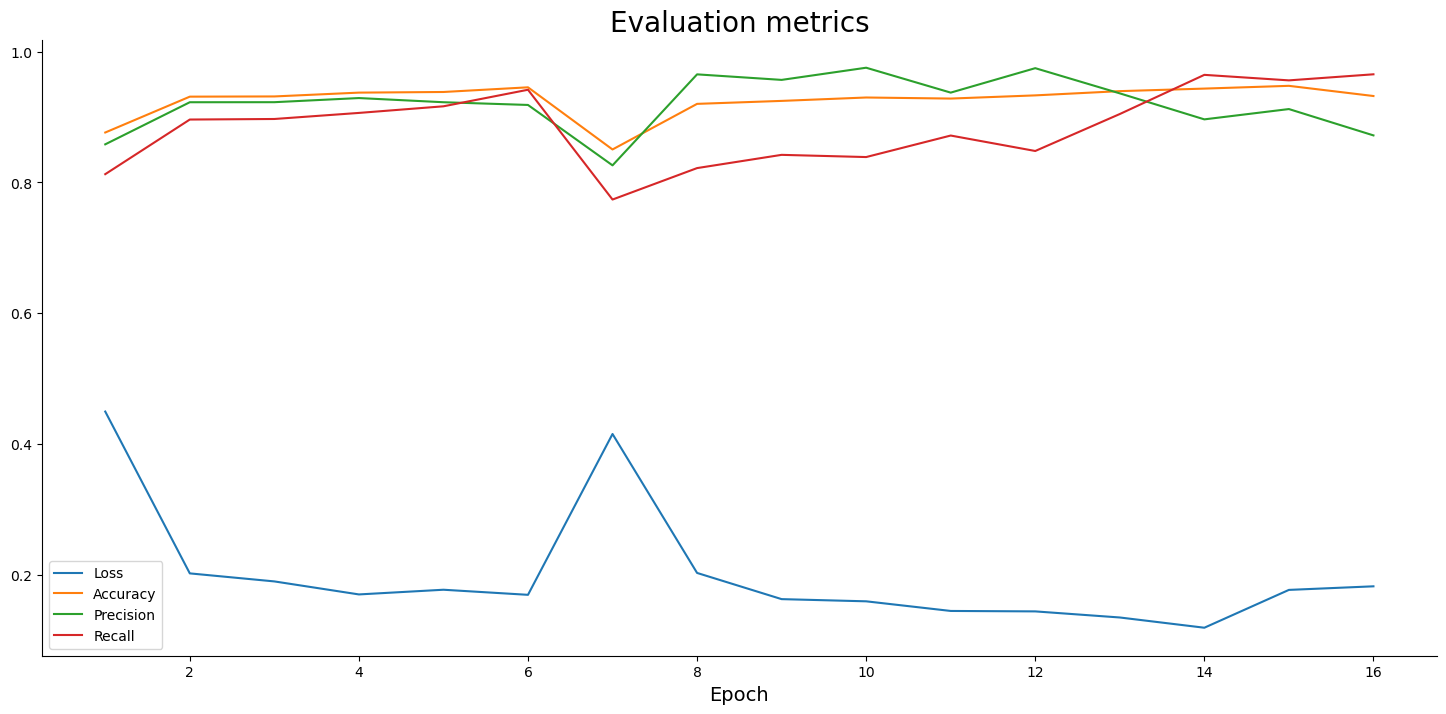

In [15]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, epochs+1), history.history['loss'], label='Loss')
plt.plot(np.arange(1, epochs+1), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1, epochs+1), history.history['precision'], label='Precision')
plt.plot(np.arange(1, epochs+1), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

48/48 [==============================] - 0s 894us/step
Accuracy: 0.93
Precision: 0.90
Recall: 0.94


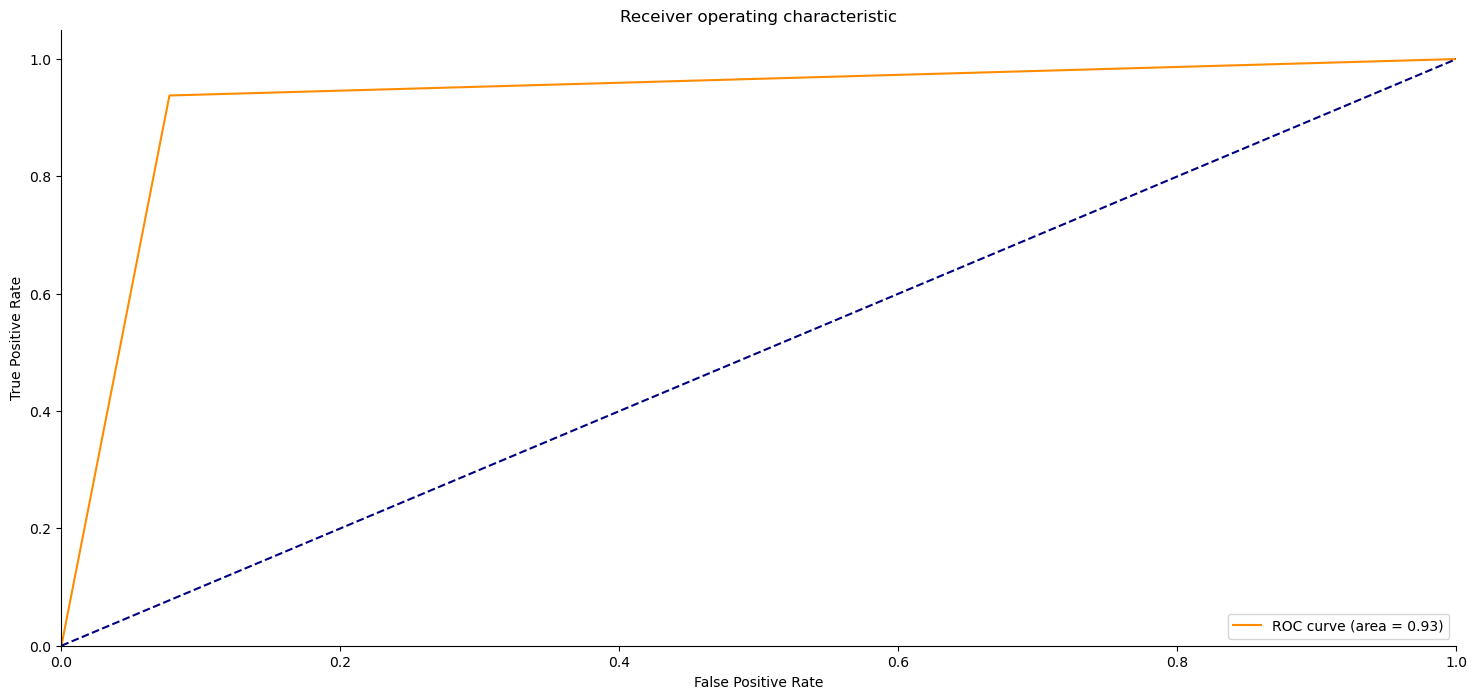

In [16]:
predictions = model.predict(X_test_scaled).round()

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

# print(confusion_matrix(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print(f"Precision: {precision_score(y_test, predictions):.2f}")
print(f"Recall: {recall_score(y_test, predictions):.2f}")

fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
# print(roc_auc)

plt.figure()
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
